## Phase 1 Project


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Reading/loading the dataset
df = pd.read_csv("data/AviationData.csv", encoding = "Latin1") #using Latin1 to laod the dataset
df #viewing the dataset 

C:\Users\Felix\AppData\Local\Temp\ipykernel_18948\133992322.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/AviationData.csv", encoding = "Latin1") #using Latin1 to laod the dataset


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#checking the dimensions(rows and columns) of the dataframe
df.shape

(88889, 31)

In [4]:
#checking the dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#checking concise descriptive statistics for numerical variables
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#checking statistical summary for categorical variables
df.describe(include="O")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [7]:
#replacing the dots in columns to underscores
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [8]:
df.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

In [9]:
# change the event_date column to a datetime dtype
df["Event_Date"] = pd.to_datetime(df["Event_Date"])

In [10]:
df.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_flight                 object
Air_carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

In [11]:
# create a dataframe copy to be used in data cleaning
df2 = df.copy(deep=True)
df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [12]:
#checking for unique values in each column

for column in df2:
    unique_values = df2[column].unique()
    print(f"Unique values in column '{column}','\n': {unique_values}", '\n')

Unique values in column 'Event_Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation_Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident_Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event_Date','
': <DatetimeArray>
['1948-10-24 00:00:00', '1962-07-19 00:00:00', '1974-08-30 00:00:00',
 '1977-06-19 00:00:00', '1979-08-02 00:00:00', '1979-09-17 00:00:00',
 '1981-08-01 00:00:00', '1982-01-01 00:00:00', '1982-01-02 00:00:00',
 '1982-01-03 00:00:00',
 ...
 '2022-12-13 00:00:00', '2022-12-14 00:00:00', '2022-12-15 00:00:00',
 '2022-12-16 00:00:00', '2022-12-17 00:00:00', '2022-12-18 00:00:00',
 '2022-12-21 00:00:00', '2022-12-22 00:00:00', '2022-12-26 00:00:00',
 '2022-12-29 00:00:00']
Length: 14782, dtype: datetime64[ns] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPOR

In [13]:
#checking for the number of unique values in each column

for column in df2:
    nunique_values = df2[column].nunique()
    print(f"Unique values in column '{column}','\n': {nunique_values}", '\n')

Unique values in column 'Event_Id','
': 87951 

Unique values in column 'Investigation_Type','
': 2 

Unique values in column 'Accident_Number','
': 88863 

Unique values in column 'Event_Date','
': 14782 

Unique values in column 'Location','
': 27758 

Unique values in column 'Country','
': 219 

Unique values in column 'Latitude','
': 25592 

Unique values in column 'Longitude','
': 27156 

Unique values in column 'Airport_Code','
': 10374 

Unique values in column 'Airport_Name','
': 24870 

Unique values in column 'Injury_Severity','
': 109 

Unique values in column 'Aircraft_damage','
': 4 

Unique values in column 'Aircraft_Category','
': 15 

Unique values in column 'Registration_Number','
': 79104 

Unique values in column 'Make','
': 8237 

Unique values in column 'Model','
': 12318 

Unique values in column 'Amateur_Built','
': 2 

Unique values in column 'Number_of_Engines','
': 7 

Unique values in column 'Engine_Type','
': 12 

Unique values in column 'FAR_Description','


## Data Cleaning

In [14]:
df2.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [15]:
#changing column names to capitalize the beginning of words
df2.columns = df2.columns.str.title()
df2.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [16]:
#Removing whitespaces in the entire dataframe if any
df2 = df2.map(lambda x: x.strip() if isinstance(x, str) else x)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88889 non-null  object        
 1   Investigation_Type      88889 non-null  object        
 2   Accident_Number         88889 non-null  object        
 3   Event_Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport_Code            50132 non-null  object        
 9   Airport_Name            52704 non-null  object        
 10  Injury_Severity         87889 non-null  object        
 11  Aircraft_Damage         85695 non-null  object        
 12  Aircraft_Category       32287 non-null  object

In [17]:
#dropping unncessary columns
df2.drop(["Event_Id", "Investigation_Type", "Accident_Number", "Latitude", "Longitude", "Airport_Code", "Airport_Name",
          "Registration_Number", "Far_Description", "Schedule", "Air_Carrier", "Total_Uninjured", "Report_Status", 
          "Publication_Date"], axis=1, inplace=True)
df2.head()

,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,VMC,Approach


In [18]:
#changing to uppercase
df2["Location"] = df2["Location"].str.upper()
df2["Make"] = df2["Make"].str.upper()
df2["Model"] = df2["Model"].str.upper()

In [19]:
df2.head()

,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"SALTVILLE, VA",United States,Fatal(3),Destroyed,NaN,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"CANTON, OH",United States,Fatal(1),Destroyed,NaN,CESSNA,501,No,NaN,NaN,Personal,1.0,2.0,NaN,VMC,Approach


In [20]:
#checking count of unique values after converting to uppercase
df2["Make"].value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

### Missing Values

In [21]:
#checking total of missing values of each column
df2.isna().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity            1000
Aircraft_Damage            3194
Aircraft_Category         56602
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6084
Engine_Type                7096
Purpose_Of_Flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Weather_Condition          4492
Broad_Phase_Of_Flight     27165
dtype: int64

In [22]:
#selecting duplicate rows
df2.loc[df2.duplicated()]

,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight
1371,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,CESSNA,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,VMC,Cruise
3082,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,BELL,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,VMC,Cruise
4761,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,SCHEMPP-HIRTH,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,VMC,Cruise
7941,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,CESSNA,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,VMC,Taxi
8661,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,SNOW,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,VMC,Landing
13532,1985-11-30,"SAN PEDRO, CA",United States,Fatal(1),Destroyed,NaN,BELL,206L-1,No,1.0,Turbo Shaft,Unknown,1.0,4.0,7.0,VMC,Approach
19820,1988-03-10,"GREENSBORO, NC",United States,Incident,NaN,NaN,BOEING,737,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,VMC,Maneuvering
21077,1988-08-05,"ATLANTA, GA",United States,Incident,Minor,NaN,DOUGLAS,DC-9-51,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,UNK,Taxi
22453,1989-03-01,"HOUSTON, TX",United States,Incident,NaN,NaN,MCDONNELL DOUGLAS,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,IMC,Approach
24878,1990-02-09,"TETERBORO, NJ",United States,Non-Fatal,Substantial,NaN,MITSUBISHI,MU-2B-35,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,VMC,Taxi


In [23]:
#dropping the duplicates and making it permanent
df2.drop_duplicates(inplace=True)

In [24]:
#reseting the df index
df2.reset_index(inplace=True, drop=True)

- I will fill the missing values with zero (0) for the total_fatal_injuries, total_serious_injuries, and total_minor_injuries columns.

- This is because the number of missing values are too many to delete the rows entirely and the mean cannot be used because one cannot be half injured.

- Therefore, filling the column with zero (0) is the most logical way to addressing the missing values.

- Zero (0) is also the mode of the columns which would be the most appropriate value to use.

In [25]:
# find the mode of the columns
mode_fatal_injuries = df2["Total_Fatal_Injuries"].mode()
mode_serious_injuries = df2["Total_Serious_Injuries"].mode()
mode_minor_injuries = df2["Total_Minor_Injuries"].mode()

# fill the missing values for each column with the mode zero (0)
df2["Total_Fatal_Injuries"].fillna(mode_fatal_injuries[0], inplace=True)
df2["Total_Serious_Injuries"].fillna(mode_serious_injuries[0], inplace=True)
df2["Total_Minor_Injuries"].fillna(mode_minor_injuries[0], inplace=True)

#check effected changes
df2.isna().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                7093
Purpose_Of_Flight          6189
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition          4490
Broad_Phase_Of_Flight     27157
dtype: int64

In [26]:
#fill the missing values using mode (0) in categorical columns

mode_engine_type = df2["Engine_Type"].mode()
mode_purpose_of_flight = df2["Purpose_Of_Flight"].mode()
mode_weather_condition = df2["Weather_Condition"].mode()

df2["Engine_Type"].fillna(mode_engine_type[0], inplace=True)
df2["Purpose_Of_Flight"].fillna(mode_purpose_of_flight[0], inplace=True)
df2["Weather_Condition"].fillna(mode_weather_condition[0], inplace=True)

#check effected changes of missing values
df2.isna().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     27157
dtype: int64

- I have used the mode for the three categorical columns above, because they have few missing values and will not significantly affect the data for analysis

In [27]:
#check count of unique values in the "Weather_Condition" column
df2["Weather_Condition"].value_counts()

Weather_Condition
VMC    81761
IMC     5975
UNK      855
Unk      262
Name: count, dtype: int64

In [28]:
# changing all values to uppercase in the weather condition column
df2["Weather_Condition"] = df2["Weather_Condition"].str.upper()

#check updated count of unique values
df2["Weather_Condition"].value_counts()

Weather_Condition
VMC    81761
IMC     5975
UNK     1117
Name: count, dtype: int64

In [29]:
#check effected changes of missing values
df2.isna().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     27157
dtype: int64

- I will filter the amateur built aircraft as they might not be the best for the company to purchase
- This is because they may not meet the required standards as far as risk management is concerned.

In [30]:
df2 = df2[df2["Amateur_Built"] == "No"]

#check changes effected
df2.isna().sum()

Event_Date                    0
Location                     47
Country                     220
Injury_Severity             997
Aircraft_Damage            3144
Aircraft_Category         51567
Make                         46
Model                        67
Amateur_Built                 0
Number_Of_Engines          5702
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     24158
dtype: int64

In [31]:
#count occurence of unique values in the column "Aircraft_Category" 
df2["Aircraft_Category"].value_counts()

Aircraft_Category
Airplane             24408
Helicopter            3294
Glider                 476
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: count, dtype: int64

- Based on the business problem, the company wants to purchase and operate airplanes for commercial and private enterprises.
- Therefore, I will major my analysis on the airplane in the "Aircraft_Category".

In [32]:
#keep rows with airplane as airplane category

df2 = df2[df2["Aircraft_Category"] == "Airplane"]

#check changes effected
df2.isna().sum()

Event_Date                    0
Location                      6
Country                       7
Injury_Severity             811
Aircraft_Damage            1269
Aircraft_Category             0
Make                          3
Model                        18
Amateur_Built                 0
Number_Of_Engines          2548
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     18613
dtype: int64

In [33]:
# fill the number of rows with the mode as engine has to be whole

mode_number_of_engines = df2["Number_Of_Engines"].mode()
df2["Number_Of_Engines"].fillna(mode_number_of_engines[0], inplace=True)

#check effected changes 
df2.isna().sum()

Event_Date                    0
Location                      6
Country                       7
Injury_Severity             811
Aircraft_Damage            1269
Aircraft_Category             0
Make                          3
Model                        18
Amateur_Built                 0
Number_Of_Engines             0
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     18613
dtype: int64

In [34]:
#remove rows where "Number_Of _Engines" is zero(0)

df2 = df2[df2["Number_Of_Engines"] != 0]

In [35]:
df2["Broad_Phase_Of_Flight"].value_counts()

Broad_Phase_Of_Flight
Landing        2071
Takeoff        1132
Cruise          759
Approach        556
Maneuvering     455
Taxi            232
Descent         163
Climb           143
Go-around       143
Standing         73
Unknown          55
Other            11
Name: count, dtype: int64

In [36]:
#fill in missing values using Unknown placeholder
df2["Broad_Phase_Of_Flight"].fillna("Unknown", inplace=True)

#check effected changes 
df2.isna().sum()

Event_Date                   0
Location                     6
Country                      7
Injury_Severity            811
Aircraft_Damage           1267
Aircraft_Category            0
Make                         3
Model                       18
Amateur_Built                0
Number_Of_Engines            0
Engine_Type                  0
Purpose_Of_Flight            0
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Weather_Condition            0
Broad_Phase_Of_Flight        0
dtype: int64

In [37]:
#subset to drop rows with missing values

df2.dropna(subset=["Location", "Country", "Injury_Severity", "Make", "Model"], inplace=True)

#check effected changes
df2.isna().sum()

Event_Date                  0
Location                    0
Country                     0
Injury_Severity             0
Aircraft_Damage           847
Aircraft_Category           0
Make                        0
Model                       0
Amateur_Built               0
Number_Of_Engines           0
Engine_Type                 0
Purpose_Of_Flight           0
Total_Fatal_Injuries        0
Total_Serious_Injuries      0
Total_Minor_Injuries        0
Weather_Condition           0
Broad_Phase_Of_Flight       0
dtype: int64

In [38]:
#subset to drop rows where ""Aircraft_Damage is empty

df2.dropna(subset=["Aircraft_Damage"], inplace=True)

#check effected changes
df2.isna().sum()

Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Make                      0
Model                     0
Amateur_Built             0
Number_Of_Engines         0
Engine_Type               0
Purpose_Of_Flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Weather_Condition         0
Broad_Phase_Of_Flight     0
dtype: int64

In [39]:
#check the summary of the cleaned data

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22711 entries, 5 to 88850
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Date              22711 non-null  datetime64[ns]
 1   Location                22711 non-null  object        
 2   Country                 22711 non-null  object        
 3   Injury_Severity         22711 non-null  object        
 4   Aircraft_Damage         22711 non-null  object        
 5   Aircraft_Category       22711 non-null  object        
 6   Make                    22711 non-null  object        
 7   Model                   22711 non-null  object        
 8   Amateur_Built           22711 non-null  object        
 9   Number_Of_Engines       22711 non-null  float64       
 10  Engine_Type             22711 non-null  object        
 11  Purpose_Of_Flight       22711 non-null  object        
 12  Total_Fatal_Injuries    22711 non-null  float64    

In [40]:
# reset the index of the cleaned data

df2.reset_index(drop=True, inplace=True)

In [41]:
df2.shape

(22711, 17)

## **Save the clean data**

In [42]:
df2.to_csv("C:/Users/Felix/OneDrive/Desktop/DS/AviationData_Clean.csv", index=False)

## Exploratory Data Analysis

- This is a key step in the decision-making process for a company looking to purchase and operate aircraft.
- By carefully examining the historical aviation data, EDA will enable me to provide valuable insights into potential risks, operational efficiency, and the overall suitability of different aircraft models.


### Data Distribution

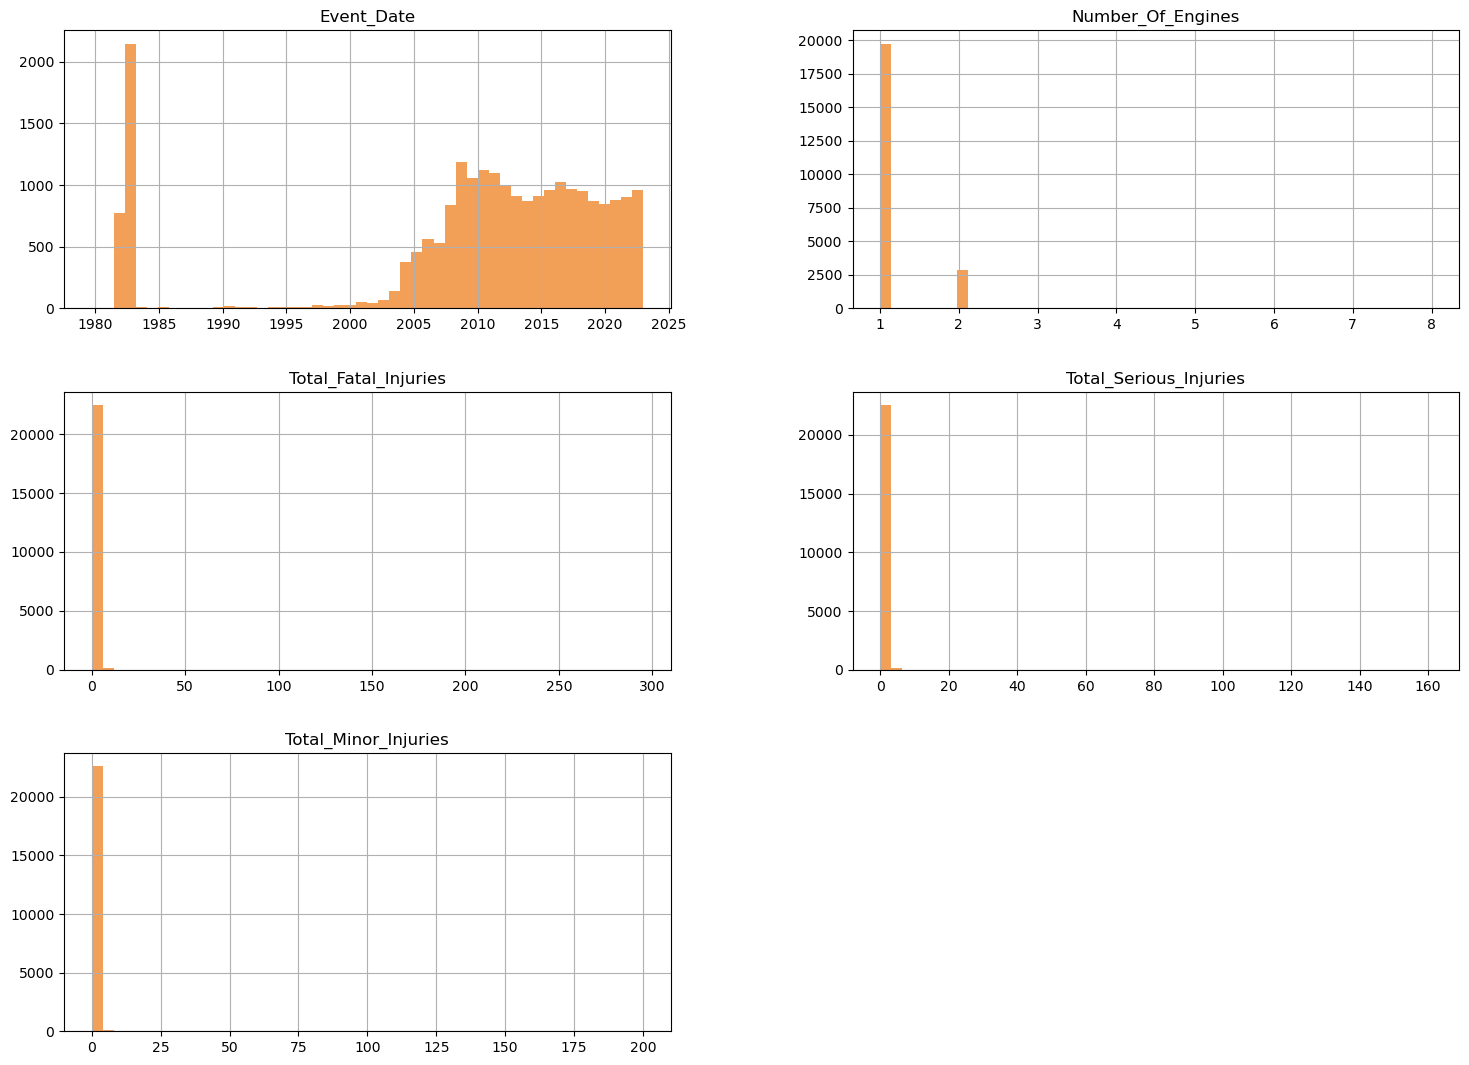

In [43]:
df2.hist(bins=50, color="#F29F58", figsize=(18,13));

## Univariate Analysis

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

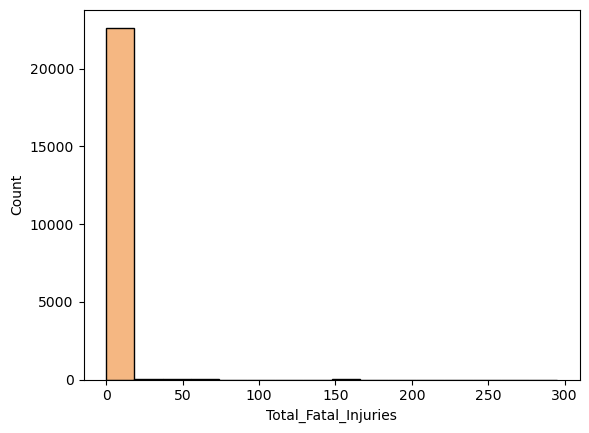

In [44]:
#bar plot to show distribution of fatal injuries
sns.histplot(df2["Total_Fatal_Injuries"], color="#F29F58")
plt.show

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


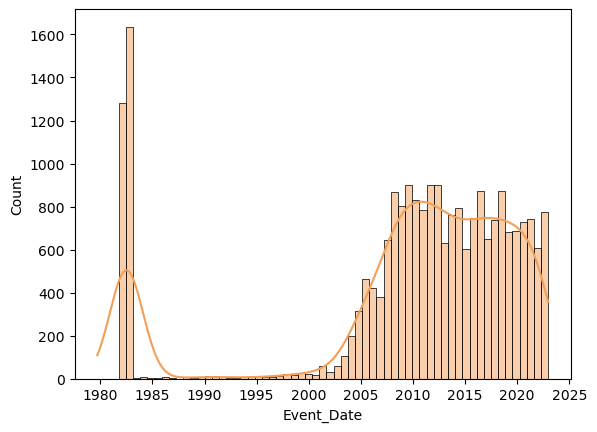

In [45]:
#plot a histogram and kde plot to show distribution of event date
sns.histplot(df2["Event_Date"], kde=True, color="#F29F58")
plt.show()

## Bivariate Analysis

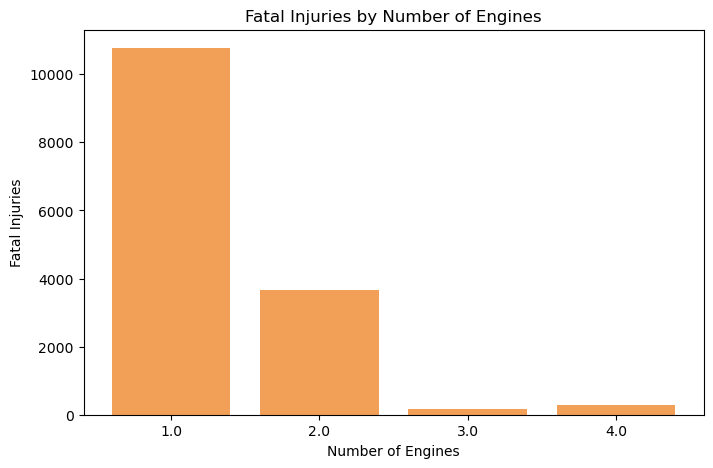

In [46]:
# get the rows where accidents had fatal injuries
fatal_injuries = df2[df2["Total_Fatal_Injuries"] > 0]

# plot the fatal accidents by the number of engines in an aircraft
fig, ax = plt.subplots(figsize=(8,5))

# group the number of engines with the total number of fatal injuries
fatal_injuries_by_number = fatal_injuries.groupby("Number_Of_Engines")["Total_Fatal_Injuries"].sum().reset_index()


ax.bar(fatal_injuries_by_number["Number_Of_Engines"], fatal_injuries_by_number["Total_Fatal_Injuries"], color="#F29F58")
ax.set_xticks(fatal_injuries_by_number["Number_Of_Engines"])
ax.set_xticklabels(fatal_injuries_by_number["Number_Of_Engines"])
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Fatal Injuries")
ax.set_title("Fatal Injuries by Number of Engines")

plt.show()

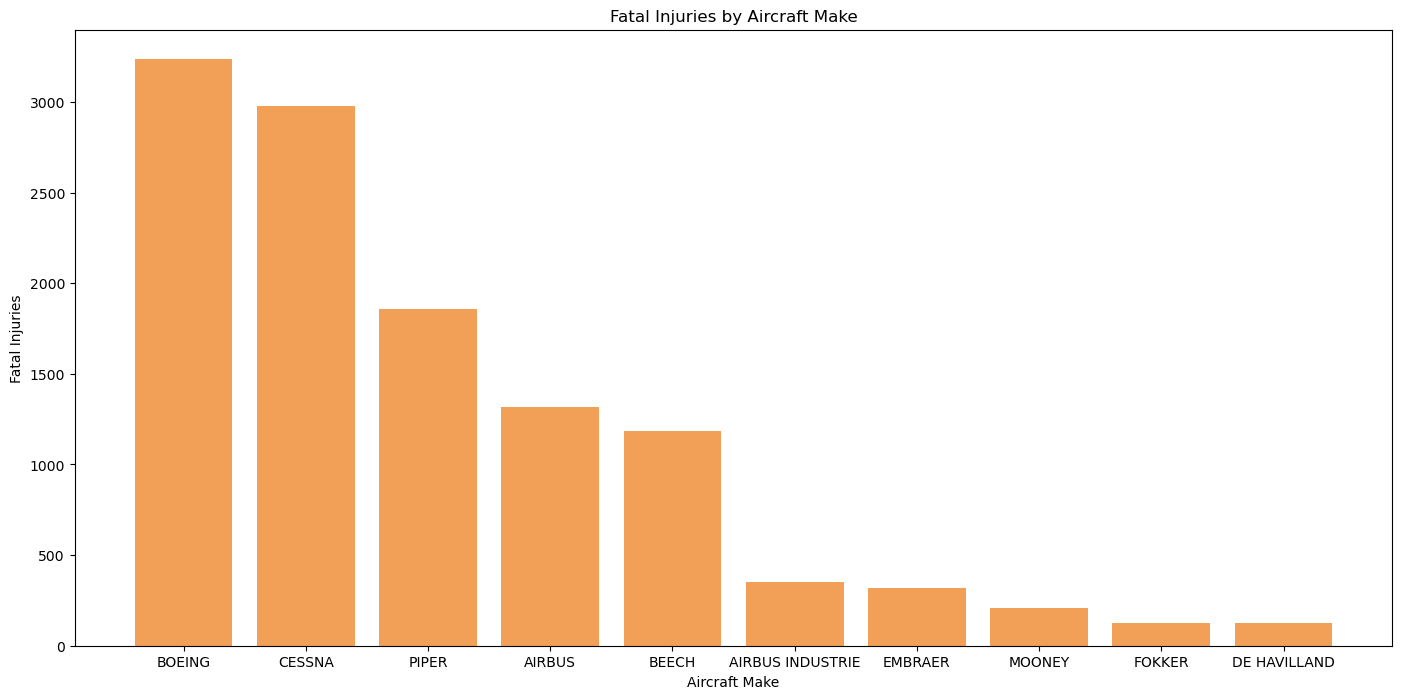

In [47]:
# plot a bar graph of fatal injuries by make of aircraft

fatal_injuries["Total_Fatal_Injuries"].value_counts().tail(10)
# use groupby to select the injuries with the Make
fatal_injuries_by_make = fatal_injuries.groupby("Make")["Total_Fatal_Injuries"].sum().reset_index()

# sort in descending order
fatal_injuries_by_make.sort_values("Total_Fatal_Injuries", ascending=False, inplace=True)

# select the top 10

top_10_makes = fatal_injuries_by_make.head(10)

fig, ax = plt.subplots(figsize=(17,8))
ax.bar(top_10_makes["Make"], top_10_makes["Total_Fatal_Injuries"], color="#F29F58")
ax.set_title("Fatal Injuries by Aircraft Make")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Fatal Injuries")

plt.show()

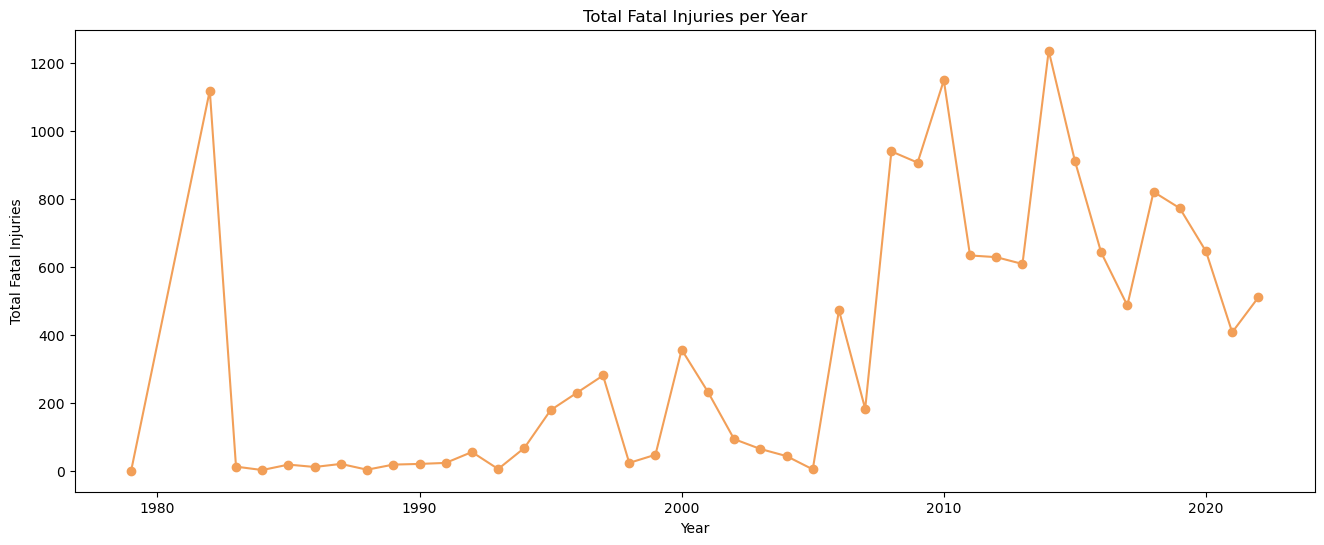

In [48]:
# plot a graph of the fatal injuries per year

# group the year and the total fatal injuries
injuries_per_year = df2.groupby(df2["Event_Date"].dt.year)["Total_Fatal_Injuries"].sum().reset_index()

plt.figure(figsize=(16,6))
plt.plot(injuries_per_year["Event_Date"], injuries_per_year["Total_Fatal_Injuries"], color="#F29F58", marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Fatal Injuries")
plt.title("Total Fatal Injuries per Year")

plt.show()

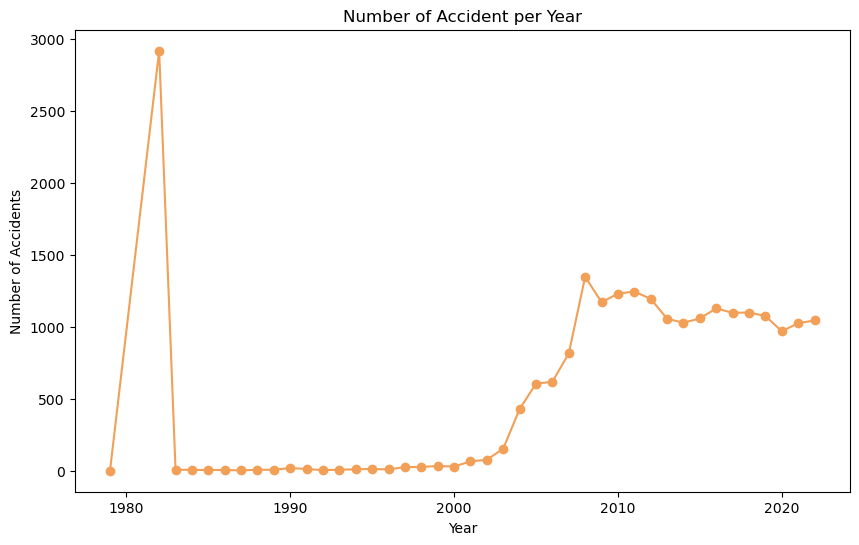

In [49]:
# plot a line of graph of total fatal injuries and the dates

# find the number of accidents per year

accidents_per_year = df2.groupby(df2["Event_Date"].dt.year).size().reset_index(name="Counts")

plt.figure(figsize=(10,6))
plt.plot(accidents_per_year["Event_Date"], accidents_per_year["Counts"], marker="o", linestyle="-", color="#F29F58")
plt.title("Number of Accident per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()